# LIBRARIES IMPORT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

# DATA IMPORT

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

# DATA EXPLORATION

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# DATA PROCESSING

In [4]:
df_p = df.drop(df[df.Year_Birth < 1920].index)

In [5]:
df_p.drop(df[df.Marital_Status =='Absurd'].index, inplace = True)
df_p.drop(df[df.Marital_Status =='YOLO'].index, inplace = True)
df_p.replace('Alone', 'Single', inplace = True)

In [6]:
df_p.drop(df[df.Income == 666666].index, inplace = True)

In [7]:
df_p.dropna(inplace=True)

# FEATURE ENGINEERING

In [8]:
#Get columns names to slice df to X below

#col = df.columns
#col

In [9]:
#Slice df to define X matrix of features

X = df_p[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


In [10]:
import seaborn as sns

In [11]:
fig = plt.figure(figsize=(20, 20))

#sns.heatmap(X.corr(), annot = True, fmt=".1f")

<Figure size 2000x2000 with 0 Axes>

In [12]:
from sklearn.preprocessing import normalize, StandardScaler, MaxAbsScaler

In [13]:
#X_n = pd.DataFrame(normalize(X, axis = 0), columns = X.columns)
scaler = StandardScaler()
#scaler = MaxAbsScaler()
#scaler

In [14]:
#scaler.fit(X[['Year_Birth']])
scaler.fit(X)

StandardScaler()

In [15]:
#scaler.mean_

In [16]:
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


In [17]:
X_n = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_n.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.017915,0.287689,-0.824004,-0.929587,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,...,2.506603,-0.555083,0.692301,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,2.381322
1,-1.274437,-0.260057,1.038228,0.907950,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,...,-0.570823,-1.169892,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935
2,-0.333858,0.913505,-0.824004,-0.929587,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,...,-0.228887,1.289346,-0.545767,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935
3,1.290779,-1.174887,1.038228,-0.929587,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,...,-0.912759,-0.555083,0.279612,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935
4,1.034258,0.294887,1.038228,-0.929587,1.553545,-0.391748,0.420464,-0.218509,0.155277,-0.001587,...,0.113050,0.059727,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935


In [18]:
#Inverse transform test

#X_r = pd.DataFrame(scaler.inverse_transform(X_n), columns = X.columns)
#X_r.head()

In [19]:
fig = plt.figure(figsize=(20, 20))

#sns.heatmap(X_n.corr(), annot = True, fmt=".1f")

<Figure size 2000x2000 with 0 Axes>

# CLASSIFICATION

In [20]:
from sklearn.cluster import KMeans

In [21]:
#X_n = X.copy()

In [22]:
sse = []
for k in range(1, 13):
    model_km = KMeans(n_clusters=k)
    model_km.fit(X_n)
    sse.append(model_km.inertia_)

C:\Users\utile\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [23]:
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
#cluster_df

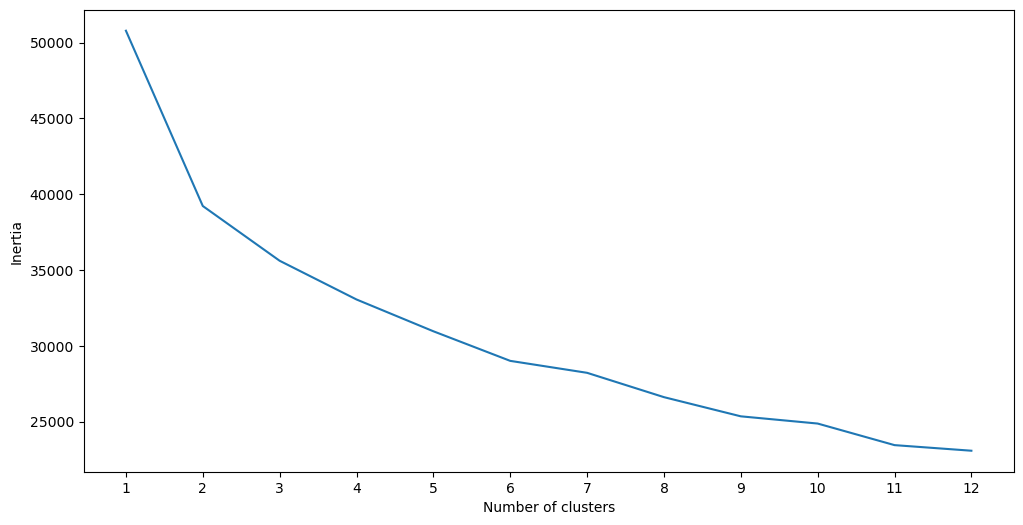

In [24]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_df['Cluster'])
plt.show()

In [25]:
n_clusters = 2
random_state = 130

In [26]:
model_orig = KMeans(n_clusters = n_clusters, random_state = random_state)
model_n = KMeans(n_clusters = n_clusters, random_state = random_state)

In [27]:
#model.get_params()

In [28]:
model_orig.fit(X)
model_n.fit(X_n)

KMeans(n_clusters=2, random_state=130)

In [29]:
#model.inertia_

In [30]:
y_pred_orig = model_orig.predict(X)
y_pred_orig_df = pd.DataFrame(y_pred_orig, columns=['y_pred'])
y_pred_orig_df['y_pred'].value_counts()

0    1134
1    1074
Name: y_pred, dtype: int64

In [31]:
y_pred_n = model_n.predict(X_n)
y_pred_n_df = pd.DataFrame(y_pred_n, columns=['y_pred'])
y_pred_n_df['y_pred'].value_counts()

0    1330
1     878
Name: y_pred, dtype: int64

In [32]:
#model.cluster_centers_

In [33]:
centers_orig = pd.DataFrame(model_orig.cluster_centers_, columns = X.columns)
centers_orig

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1970.968254,34550.22575,0.716931,0.473545,49.055556,78.688713,7.109347,36.435626,11.233686,7.426808,...,0.854497,3.649030,6.651675,0.082892,0.023810,0.000882,0.003527,0.003527,0.011464,0.112875
1,1966.725326,70308.50838,0.152700,0.540037,49.059590,544.420857,46.558659,304.866853,65.289572,47.800745,...,4.585661,8.082868,3.918994,0.064246,0.127561,0.148045,0.127561,0.024209,0.006518,0.189013


In [34]:
centers_n = pd.DataFrame(model_n.cluster_centers_, columns = X.columns)
centers_n

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.103515,-0.604323,0.465557,0.092802,-0.004093,-0.596807,-0.493483,-0.577623,-0.505921,-0.493484,...,-0.606816,-0.565946,0.442516,-0.020657,-0.148491,-0.279508,-0.239654,-0.104374,0.007562,-0.152446
1,-0.156805,0.915432,-0.705228,-0.140577,0.006201,0.904047,0.747531,0.874987,0.766373,0.747533,...,0.919209,0.857299,-0.670326,0.031291,0.224935,0.423401,0.363029,0.158106,-0.011455,0.230927


In [35]:
centers_n = pd.DataFrame(scaler.inverse_transform(centers_n), columns = X.columns)
centers_n

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1970.115038,38931.315789,0.692481,0.556391,48.939098,103.786466,6.695489,37.463158,9.921053,6.781955,...,0.894737,3.964662,6.394737,0.068421,0.035338,-1.387779e-17,0.005263,0.001504,0.009774,0.095489
1,1967.070615,71654.492027,0.063781,0.429385,49.236902,610.370159,55.992027,363.233485,79.345103,57.790433,...,5.357631,8.594533,3.698178,0.082005,0.133257,1.822323e-01,0.152620,0.031891,0.007973,0.232346


## EVALUATION

In [54]:
from sklearn.metrics import silhouette_score

In [48]:
#model_orig.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [56]:
sil_orig = silhouette_score(X, model_orig.labels_) # metric='euclidean', sample_size=None, random_state=None, **kwds
sil_orig

0.6065025973843574

In [57]:
sil_n = silhouette_score(X, model_n.labels_) # metric='euclidean', sample_size=None, random_state=None, **kwds
sil_n

0.4863420190193583

## BACK TO FEATURES ENGINEERING

In [38]:
#sns.pairplot(X)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA()

In [41]:
pca = PCA(n_components=2)

In [42]:
pca.fit(X)

PCA(n_components=2)

In [43]:
X_pca = pca.transform(X)
 
# Check the dimensions of data after PCA
print(X_pca.shape)

(2208, 2)


In [44]:
# Check the values of eigen vectors
# prodeced by principal components
pca.components_

array([[-1.09247743e-04,  9.99913497e-01, -1.28307752e-05,
         8.97508844e-07,  1.01808488e-05,  1.07911105e-02,
         9.34805643e-04,  7.21421039e-03,  1.31731223e-03,
         9.99609765e-04,  9.26579110e-04, -9.63604194e-06,
         5.85933436e-05,  9.45792481e-05,  9.54079171e-05,
        -7.31507396e-05, -1.81477602e-07,  2.67877159e-06,
         4.75493252e-06,  3.70882433e-06,  5.60139021e-07,
        -1.22524495e-07,  2.66604017e-06],
       [ 7.60068732e-04,  1.20792536e-02,  4.50668121e-04,
         1.75903607e-04, -2.07336504e-03, -9.79085575e-01,
        -1.44195497e-02, -1.96888759e-01, -2.17196172e-02,
        -1.23415327e-02, -4.00596352e-02, -8.00828770e-04,
        -3.50664063e-03, -3.00917342e-03, -3.74105036e-03,
        -1.47415251e-03, -1.07531175e-04, -3.00195352e-04,
        -3.00569794e-04, -1.83626236e-04, -8.12534467e-05,
         8.96209079e-06, -2.94604853e-04]])

Text(0, 0.5, 'pc2')

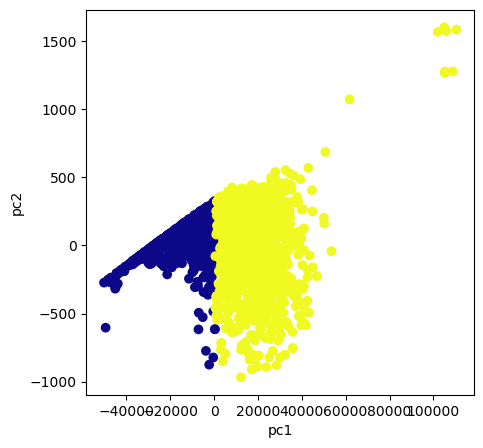

In [45]:
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred_orig,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')